In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [57]:
num_samples_per_class = 1000
negative_s = np.random.multivariate_normal(mean=[0,5], cov=[[2, 1.5],[1.5,2]], size=num_samples_per_class)
positive_s = np.random.multivariate_normal(mean=[5, 0], cov=[[5, 1.5],[1.5, 5]], size=num_samples_per_class) #more spread out

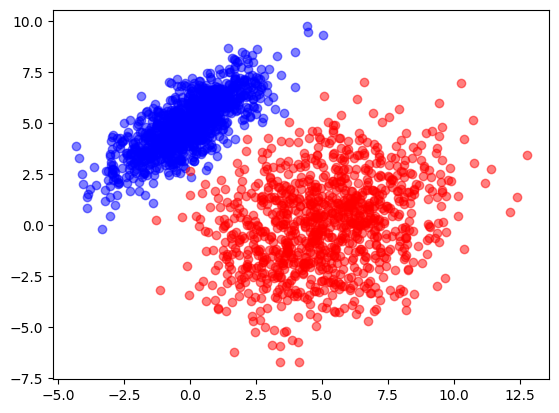

In [58]:
plt.scatter(negative_s[:,0], negative_s[:,1], color='blue', alpha=0.5, label='negative_points_dataset')
plt.scatter(positive_s[:,0], positive_s[:,1], color='red', alpha=0.5, label='positive_points_dataset')
plt.show()

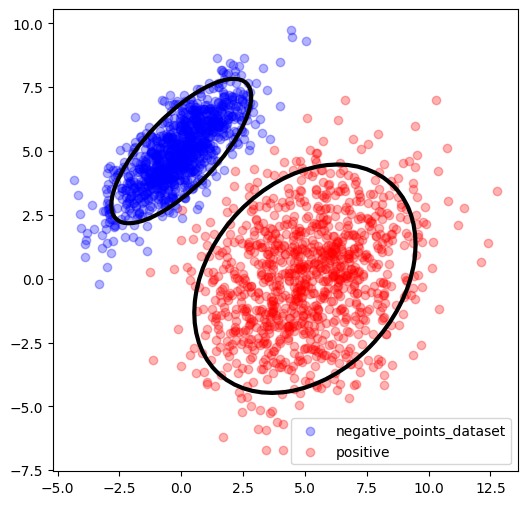

In [59]:
#cov = shape + orientation of the data spread
def plot_cov_ellipse(mean, cov, ax, color, scale=2):
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1] #descending order

    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order] #take all the rows and reorde for eigenvectors
    theta= np.degrees(np.arctan2(*eigenvectors[:,0][::-1])) #angle ellipse
    width, height = 2*scale*np.sqrt(eigenvalues) #ellipse axes

    ellipse=patches.Ellipse(xy=mean, width=width, height=height, angle=theta, edgecolor=color, fc='None', lw=3)
    ax.add_patch(ellipse)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(negative_s[:,0], negative_s[:,1], color='blue', alpha=0.3, label='negative_points_dataset')
ax.scatter(positive_s[:,0], positive_s[:,1], color='red', alpha=0.3, label='positive')
plot_cov_ellipse([0,5], [[2, 1.5],[1.5,2]], ax, 'black')
plot_cov_ellipse([5,0], [[5,1.5],[1.5,5]], ax, 'black')
ax.legend()
plt.show()







(2000, 2)

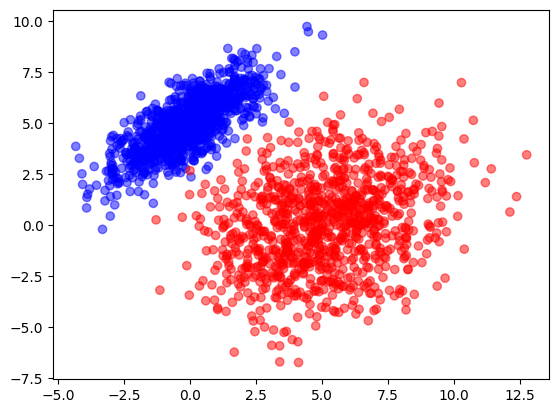

In [60]:
inputs = np.vstack((negative_s,positive_s)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class,1), dtype='float32'), np.ones((num_samples_per_class,1), dtype='float32'))) #the one is to store it as column
colors = ['blue' if t==0 else 'red' for t in targets[:,0]]
plt.scatter(inputs[:,0], inputs[:,1], c=colors, alpha=0.5)
inputs.shape

In [61]:
rows_dim=2 #2 features in the input 
columns_dim=3 #3 neurons
W = tf.Variable(initial_value=tf.random.uniform(shape=(rows_dim, columns_dim)))
b = tf.Variable(initial_value=tf.ones(shape=(3,)))
#Input= 2000x2 Weight=2x3 Bias=3


In [62]:
lr = 0.1
def model(inputs):
    return tf.matmul(inputs, W) + b
def square_loss(targets, predictions):
    per_sample_losses= tf.square(predictions-targets)
    return tf.reduce_mean(per_sample_losses)
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, (W,b)) #compute gradients
    W.assign_sub(grad_loss_wrt_W*lr) #update weights
    b.assign_sub(grad_loss_wrt_b*lr)
    return loss


In [63]:
for step in range(40):
    loss= training_step(inputs, targets)
    print(f"Loss at step {step} is: {loss:.4f}")

Loss at step 0 is: 4.7602
Loss at step 1 is: 0.2886
Loss at step 2 is: 0.0899
Loss at step 3 is: 0.0790
Loss at step 4 is: 0.0770
Loss at step 5 is: 0.0754
Loss at step 6 is: 0.0739
Loss at step 7 is: 0.0725
Loss at step 8 is: 0.0712
Loss at step 9 is: 0.0698
Loss at step 10 is: 0.0686
Loss at step 11 is: 0.0674
Loss at step 12 is: 0.0662
Loss at step 13 is: 0.0650
Loss at step 14 is: 0.0639
Loss at step 15 is: 0.0629
Loss at step 16 is: 0.0619
Loss at step 17 is: 0.0609
Loss at step 18 is: 0.0600
Loss at step 19 is: 0.0590
Loss at step 20 is: 0.0582
Loss at step 21 is: 0.0573
Loss at step 22 is: 0.0565
Loss at step 23 is: 0.0557
Loss at step 24 is: 0.0550
Loss at step 25 is: 0.0542
Loss at step 26 is: 0.0535
Loss at step 27 is: 0.0529
Loss at step 28 is: 0.0522
Loss at step 29 is: 0.0516
Loss at step 30 is: 0.0510
Loss at step 31 is: 0.0504
Loss at step 32 is: 0.0498
Loss at step 33 is: 0.0493
Loss at step 34 is: 0.0488
Loss at step 35 is: 0.0483
Loss at step 36 is: 0.0478
Loss at ste

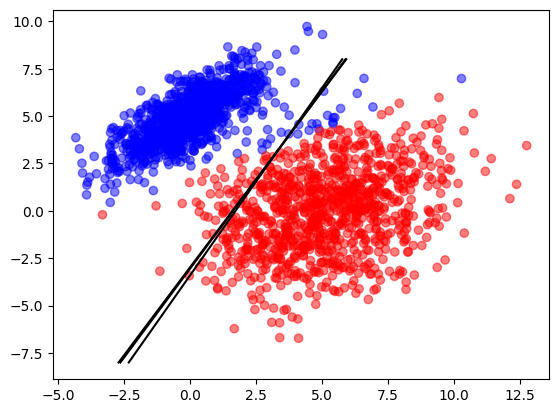

In [65]:
predictions=model(inputs) #Doing inference
x=np.linspace(-8,8,100) #100 values from -1 to 4
for neuron_col in range(W.shape[1]): #columns=3neurons=3decision_boundaries
    slope= -W[0,neuron_col]/W[1,neuron_col]
    intercept= (0.5 -b[neuron_col])/W[1,neuron_col]
    y = slope*x + intercept
    plt.plot(y, x, color="black")
colors = ['blue' if p<0.5 else 'red' for p in predictions[:,0]]
plt.scatter(inputs[:,0], inputs[:,1], c=colors, alpha=0.5)